In [1]:
import pandas as pd

In [2]:
url = "https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-apr14.csv"
df = pd.read_csv(url)
df

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [3]:
# df[["Lat","Lon","Base"]]
df["Lat"]

,Lat
0,40.7690
1,40.7267
2,40.7316
3,40.7588
4,40.7594
...,...
564511,40.7640
564512,40.7629
564513,40.7443
564514,40.6756


In [4]:
geo = df[["Lat", "Lon"]].dropna()
geo

,Lat,Lon
0,40.7690,-73.9549
1,40.7267,-74.0345
2,40.7316,-73.9873
3,40.7588,-73.9776
4,40.7594,-73.9722
...,...,...
564511,40.7640,-73.9744
564512,40.7629,-73.9672
564513,40.7443,-73.9889
564514,40.6756,-73.9405


In [5]:
test = geo[geo["Lat"].between(40.5,41.0) & geo["Lon"].between(-74.5,-73.5)]
test


,Lat,Lon
0,40.7690,-73.9549
1,40.7267,-74.0345
2,40.7316,-73.9873
3,40.7588,-73.9776
4,40.7594,-73.9722
...,...,...
564511,40.7640,-73.9744
564512,40.7629,-73.9672
564513,40.7443,-73.9889
564514,40.6756,-73.9405


In [6]:
len(geo)

564516

In [7]:

# test.reset_index(drop=True)
geo = test.sample(n=20000,random_state=42)
geo

,Lat,Lon
380350,40.7583,-73.9733
329197,40.6980,-73.9677
74873,40.7580,-73.9796
186834,40.7128,-73.9479
261143,40.7278,-73.9967
...,...,...
254612,40.6436,-73.7899
271889,40.7683,-73.8626
246162,40.7795,-73.9738
256155,40.7344,-74.0027


In [8]:
geo.shape, geo.head(), geo.tail()

((20000, 2),
             Lat      Lon
 380350  40.7583 -73.9733
 329197  40.6980 -73.9677
 74873   40.7580 -73.9796
 186834  40.7128 -73.9479
 261143  40.7278 -73.9967,
             Lat      Lon
 254612  40.6436 -73.7899
 271889  40.7683 -73.8626
 246162  40.7795 -73.9738
 256155  40.7344 -74.0027
 162235  40.7228 -73.9969)

In [9]:
geo = geo.reset_index(drop=True)
geo.shape, geo.head(), geo.tail()


((20000, 2),
        Lat      Lon
 0  40.7583 -73.9733
 1  40.6980 -73.9677
 2  40.7580 -73.9796
 3  40.7128 -73.9479
 4  40.7278 -73.9967,
            Lat      Lon
 19995  40.6436 -73.7899
 19996  40.7683 -73.8626
 19997  40.7795 -73.9738
 19998  40.7344 -74.0027
 19999  40.7228 -73.9969)

In [10]:
import numpy as np
from sklearn.cluster import DBSCAN

In [11]:
coords = np.radians(geo[["Lat", "Lon"]].values)

# DBSCAN parameters
# eps is in radians → 0.5 km ≈ 0.5 / 6371
kms_per_radian = 6371.0088
eps_km = 0.5 #points within 0.5 km (500 meters) are “nearby”
eps = eps_km / kms_per_radian

dbscan = DBSCAN(
    eps=eps,
    min_samples=20,
    metric="haversine",
    algorithm="ball_tree"
)

labels = dbscan.fit_predict(coords)
geo["cluster"] = labels
geo.head()

,Lat,Lon,cluster
0,40.7583,-73.9733,0
1,40.6980,-73.9677,1
2,40.7580,-73.9796,0
3,40.7128,-73.9479,2
4,40.7278,-73.9967,0


In [12]:
clusters = geo[geo["cluster"] != -1]
anomalies = geo[geo["cluster"] == -1]

print("Clusters:", clusters.shape)
print("Anomalies:", anomalies.shape)

Clusters: (18958, 3)
Anomalies: (1042, 3)


In [14]:
import matplotlib.pyplot as plt


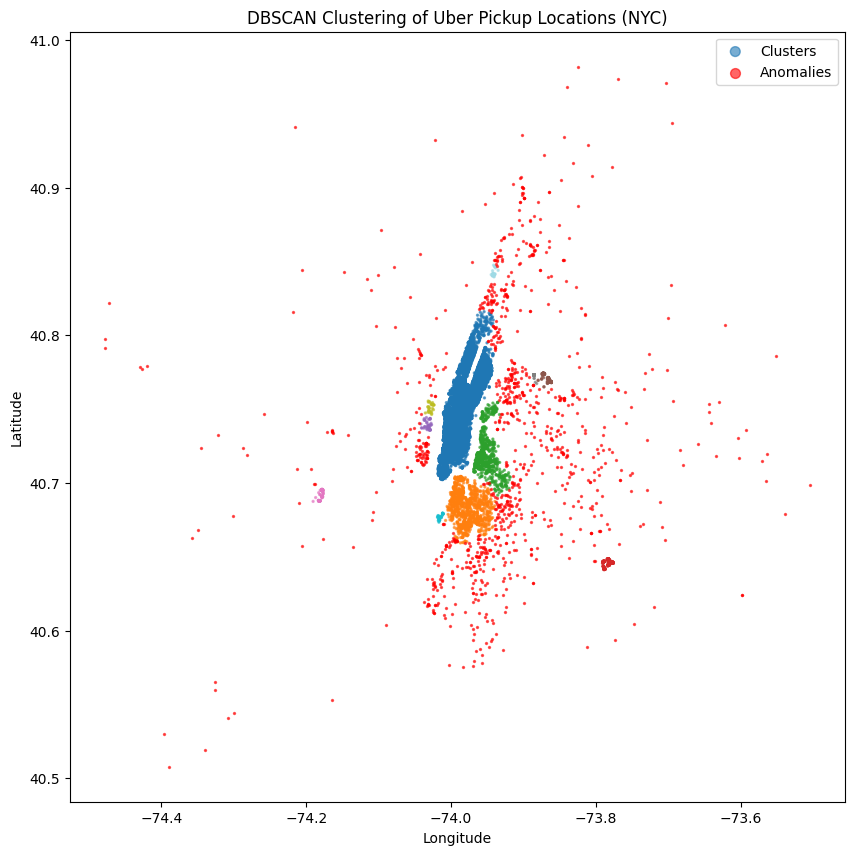

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(clusters["Lon"],
            clusters["Lat"],
            c=clusters["cluster"],
            cmap="tab20",
            s=2,
            alpha=0.6,
            label="Clusters")
plt.scatter(
    anomalies["Lon"],
    anomalies["Lat"],
    c="red",
    s=2,
    alpha=0.6,
    label="Anomalies"
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN Clustering of Uber Pickup Locations (NYC)")
plt.legend(markerscale=5)
plt.show()

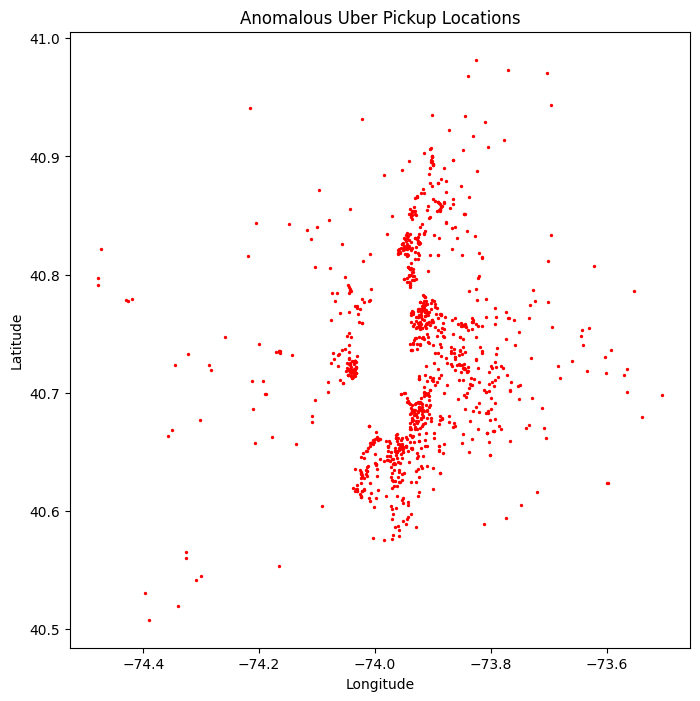

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(anomalies["Lon"], anomalies["Lat"], c="red", s=2)
plt.title("Anomalous Uber Pickup Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



In [26]:
from sklearn.metrics import silhouette_score

X_clustered = clusters[["Lat", "Lon"]]
labels_clustered = clusters["cluster"]

sil_score = silhouette_score(X_clustered, labels_clustered)
print(sil_score)


0.25233088859291214


In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=42)
geo["kmeans_cluster"] = kmeans.fit_predict(
    geo[["Lat", "Lon"]]
)

kmeans_sil = silhouette_score(
    geo[["Lat", "Lon"]],
    geo["kmeans_cluster"]
)

print(kmeans_sil)

0.37365325764564083


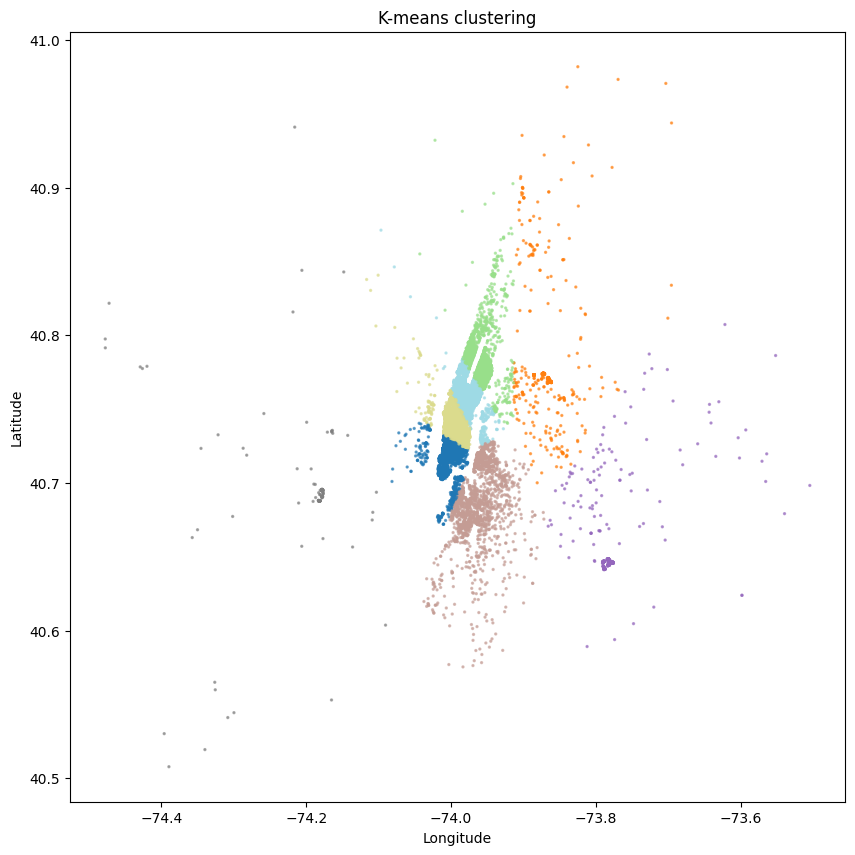

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(geo["Lon"],
            geo["Lat"],
            c=geo["kmeans_cluster"],
            cmap="tab20",
            s=2,
            alpha=0.6,
            label="KmeansClusters")
plt.title("K-means clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()